In [270]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import scatter_matrix
import re
from dataexplorer import make_post_dataframe, tag_cleaner, get_schema, read_xml, infer_schema
%matplotlib inline




In [266]:
sample_file = ('startups.stackexchange.com/Posts.xml')
schema = get_schema("QueryResults.csv")
print(schema)



column_name
Id                            int
PostTypeId                tinyint
AcceptedAnswerId              int
ParentId                      int
CreationDate             datetime
DeletionDate             datetime
Score                         int
ViewCount                     int
Body                     nvarchar
OwnerUserId                   int
OwnerDisplayName         nvarchar
LastEditorUserId              int
LastEditorDisplayName    nvarchar
LastEditDate             datetime
LastActivityDate         datetime
Title                    nvarchar
Tags                     nvarchar
AnswerCount                   int
CommentCount                  int
FavoriteCount                 int
ClosedDate               datetime
CommunityOwnedDate       datetime
dtype: object


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [267]:
data = read_xml(sample_file)
df = make_post_dataframe(
                        data,
                        schema,
                        col_to_clean = 'Tags'
                        )


In [282]:
df = infer_schema(df, schema)
df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,1.0,1.0,300.0,NaN,2014-07-30 19:41:29.087,NaT,21.0,1458.0,"<p>After registering my small LLC, I signed up...",9.0,...,None,2014-08-10 19:31:09.460,2014-08-11 09:00:51.983,Is my LLC required to have a registered agent?,llc,2.0,2.0,3.0,NaT,NaT
1,1.0,1.0,300.0,NaN,2014-07-30 19:41:29.087,NaT,21.0,1458.0,"<p>After registering my small LLC, I signed up...",9.0,...,None,2014-08-10 19:31:09.460,2014-08-11 09:00:51.983,Is my LLC required to have a registered agent?,new-hampshire,2.0,2.0,3.0,NaT,NaT
2,1.0,1.0,300.0,NaN,2014-07-30 19:41:29.087,NaT,21.0,1458.0,"<p>After registering my small LLC, I signed up...",9.0,...,None,2014-08-10 19:31:09.460,2014-08-11 09:00:51.983,Is my LLC required to have a registered agent?,united-states,2.0,2.0,3.0,NaT,NaT
3,2.0,1.0,32.0,NaN,2014-07-30 19:47:53.110,NaT,42.0,3155.0,"<p>If I have a startup that produces apps, is ...",7.0,...,None,2015-04-24 20:12:53.127,2015-07-22 15:08:33.257,Dividing profits amongst developers and designers,tech-company,6.0,0.0,30.0,NaT,NaT
4,2.0,1.0,32.0,NaN,2014-07-30 19:47:53.110,NaT,42.0,3155.0,"<p>If I have a startup that produces apps, is ...",7.0,...,None,2015-04-24 20:12:53.127,2015-07-22 15:08:33.257,Dividing profits amongst developers and designers,mobile-apps,6.0,0.0,30.0,NaT,NaT


In [295]:
answer_ids = pd.DataFrame(df['AcceptedAnswerId'][df['AcceptedAnswerId'].isnull()==False].unique(), columns=['Id'])
print(len(answer_ids))
answer_ids





1262


,Id
0,300.0
1,32.0
2,30.0
3,162.0
4,36.0


In [303]:
#dataframe of all the answers
answers = df[df['PostTypeId']==2]
answers[['CreationDate','ParentId','OwnerUserId']]



,CreationDate,ParentId,OwnerUserId
8,2014-07-30 20:11:48.287,2.0,20.0
13,2014-07-30 20:27:42.783,2.0,9.0
14,2014-07-30 20:31:00.977,1.0,27.0
15,2014-07-30 20:34:31.837,2.0,12.0
16,2014-07-30 20:37:16.690,2.0,28.0
17,2014-07-30 20:41:21.583,6.0,28.0
32,2014-07-30 21:13:51.980,14.0,45.0
34,2014-07-30 21:24:57.663,7.0,52.0
35,2014-07-30 21:32:30.203,16.0,52.0
36,2014-07-30 21:32:43.860,19.0,55.0


In [261]:
answer_ids = pd.DataFrame(df['AcceptedAnswerId'].unique())
answer_ids
df['Id']
df1=pd.merge(df, answer_ids, left_on='Id', right_on=0, how = 'inner')
# df['Id'].value_counts()["300"]
df1['Id'].value_counts()[300]

1

In [258]:
values =df['Id'].value_counts()
# values
values["4024"]

5

In [259]:
df.describe()
number_columns=['ViewCount', 'AnswerCount', 'FavoriteCount', 'Score']
date_columns = ['CreationDate', 'LastActivityDate']

In [172]:
df.groupby(['Tags'])[number_columns].sum()

column_name,ViewCount,AnswerCount,Score
Tags,,,
83b,211205344326,22110,93010
ab-testing,53707187,1213,1233
accelerators,4292331513080127972435,222032110,702157531
accounting,2181866194937103138481206495837523024282521351...,1211111112126131121201112101201112312,41045524232236461554123332314402000100
acquisition,179988186345698963386564121813,121311122100,245343382100
advertising,8967029433212037545710453286553363156157127261...,2313411912121133213311110132120411111111242211...,2335581026212472551056262223120323421042412323...
affiliate-marketing,363942854398205574221940,12311012012,242321110-10
agile,9001307801331106263,2443122,5427341
analytics,110564855394140241448,1111211112,152341110-1


In [184]:
counts =df.groupby(['Tags'])['Id'].count()
counts.sort_values(ascending=False)

Tags
legal                      308
tech-company               305
marketing                  285
equity                     184
mobile-apps                179
united-states              176
startup-costs              173
website                    166
business-plan              166
software                   156
business-model             135
taxes                      134
funding                    115
intellectual-property      106
investment                 103
sales                      102
market-research             96
lean-startup                94
idea                        94
business-registration       93
investors                   89
product                     89
advertising                 89
llc                         88
payment                     88
web-development             79
partnership                 72
growth                      70
customer-development        68
co-founder                  67
                          ... 
app-store                    3
net

In [46]:
df_tags.Count.describe()

count    279.000000
mean      27.121864
std       44.594006
min        1.000000
25%        5.000000
50%       10.000000
75%       26.500000
max      308.000000
Name: Count, dtype: float64

In [156]:
schema = pd.read_csv("QueryResults.csv")
schema['column_name'][0] = 'Id'
schema[['column_name', 'data_type']]
schema = pd.Series(data = schema['data_type'].values, index=schema['column_name'])
b = schema.index
a = schema.index.drop('Tags')
b

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object', name='column_name')

In [53]:
schema.values

array(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'], dtype=object)

In [57]:
post_files = 'startups.stackexchange.com/Posts.xml'
posts_parsed = ET.parse(post_files)
nodes = posts_parsed.getroot()
labels = schema.values
row_values = []

df_posts = pd.DataFrame(columns=row_values)

for node in nodes:
    raw_tags = node.attrib.get('Tags')
    if raw_tags:
        cleaned_tags = re.sub(r'<','', raw_tags)
        tags = cleaned_tags.split('>')[:-1]
    else:
        tags = []
    values =[]
    for column in labels:
        if column == 'Tags':
            pass
        column_value = node.attrib.get(column)
        values.append(column_value)
            
            
                
            
            
        column_value = node.attrib.get(column)
        values.append(column_value)
#     print("\n Appending: \n {} \n".format(values))
    df_posts = df_posts.append(pd.Series(values, index = labels),ignore_index=True)
    
df_posts.head()


    

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,DeletionDate,FavoriteCount,Id,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,300,2,"<p>After registering my small LLC, I signed up...",None,2,None,2014-07-30T19:41:29.087,None,3,1,...,None,9,None,9,None,1,21,<llc><new-hampshire><united-states>,Is my LLC required to have a registered agent?,1458
1,32,6,"<p>If I have a startup that produces apps, is ...",None,0,None,2014-07-30T19:47:53.110,None,30,2,...,None,551,None,7,None,1,42,<tech-company><mobile-apps><equity>,Dividing profits amongst developers and designers,3155
2,None,None,<p>Mobile applications can be classed as </p>\...,None,0,None,2014-07-30T19:53:58.387,None,None,3,...,None,3045,None,3045,None,5,0,None,None,None
3,None,None,For questions specifically pertaining to runni...,None,0,None,2014-07-30T19:53:58.387,None,None,4,...,None,59,None,3045,None,4,0,None,None,None
4,None,None,<p>It depends on what kind of a Mobile Applica...,None,0,None,2014-07-30T20:11:48.287,None,None,5,...,None,None,None,20,2,2,1,None,None,None


In [59]:
df_posts
df_posts.describe().T

,count,unique,top,freq
AcceptedAnswerId,1262,1262,12781,1
AnswerCount,3014,14,1,1302
Body,8518,8477,,36
ClosedDate,179,179,2016-12-31T15:12:49.743,1
CommentCount,8518,20,0,5184
CommunityOwnedDate,8,8,2015-08-09T16:59:19.873,1
CreationDate,8518,8435,2014-11-22T04:16:43.167,2
DeletionDate,0,0,NaN,NaN
FavoriteCount,872,22,1,486
Id,8518,8518,694,1


In [88]:
df_posts['Tags'].fillna(value=np.nan, inplace=True)

In [99]:
untagged_posts = df_posts['Tags'][df_posts['Tags'].isnull()]
len(untagged_posts)/len(df_posts['Tags'])

0.6461610706738671

In [101]:
df_posts['ViewCount'] = df_posts['ViewCount'].astype(float)
df_posts['AnswerCount'] = df_posts['AnswerCount'].astype(float)
df_posts['FavoriteCount'] = df_posts['FavoriteCount'].astype(float)
df_posts['Score'] = df_posts['Score'].astype(float)
df_posts['CreationDate'] = pd.to_datetime(df_posts['CreationDate'])
df_posts['LastActivityDate'] = pd.to_datetime(df_posts['LastActivityDate'])



In [108]:
initial_columns = ['ViewCount', 'AnswerCount', 'FavoriteCount', 'Score', 'CreationDate', 'LastActivityDate', 'Tags']

In [110]:
EDA_shit = df_posts[initial_columns]

In [111]:
EDA_shit.describe().T

,count,mean,std,min,25%,50%,75%,max
ViewCount,3014.0,272.163902,1410.872635,1.0,48.0,85.0,161.0,49034.0
AnswerCount,3014.0,1.777704,1.441072,0.0,1.0,1.0,2.0,30.0
FavoriteCount,872.0,1.733945,2.916810,0.0,1.0,1.0,2.0,37.0
Score,8518.0,2.340690,3.659503,-4.0,1.0,2.0,3.0,94.0


In [116]:
EDA_untagged = EDA_shit[EDA_shit['Tags'].isnull()]
EDA_tagged = EDA_shit[EDA_shit['Tags'].isnull()==False]

In [118]:
EDA_untagged.drop('Tags',axis=1).describe()

,ViewCount,AnswerCount,FavoriteCount,Score
count,0.0,0.0,0.0,5504.000000
mean,NaN,NaN,NaN,2.091751
std,NaN,NaN,NaN,3.403418
min,NaN,NaN,NaN,-4.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,3.000000
max,NaN,NaN,NaN,90.000000


In [119]:
EDA_tagged.describe()

,ViewCount,AnswerCount,FavoriteCount,Score
count,3014.000000,3014.000000,872.000000,3014.000000
mean,272.163902,1.777704,1.733945,2.795289
std,1410.872635,1.441072,2.916810,4.047211
min,1.000000,0.000000,0.000000,-4.000000
25%,48.000000,1.000000,1.000000,1.000000
50%,85.000000,1.000000,1.000000,2.000000
75%,161.000000,2.000000,2.000000,4.000000
max,49034.000000,30.000000,37.000000,94.000000


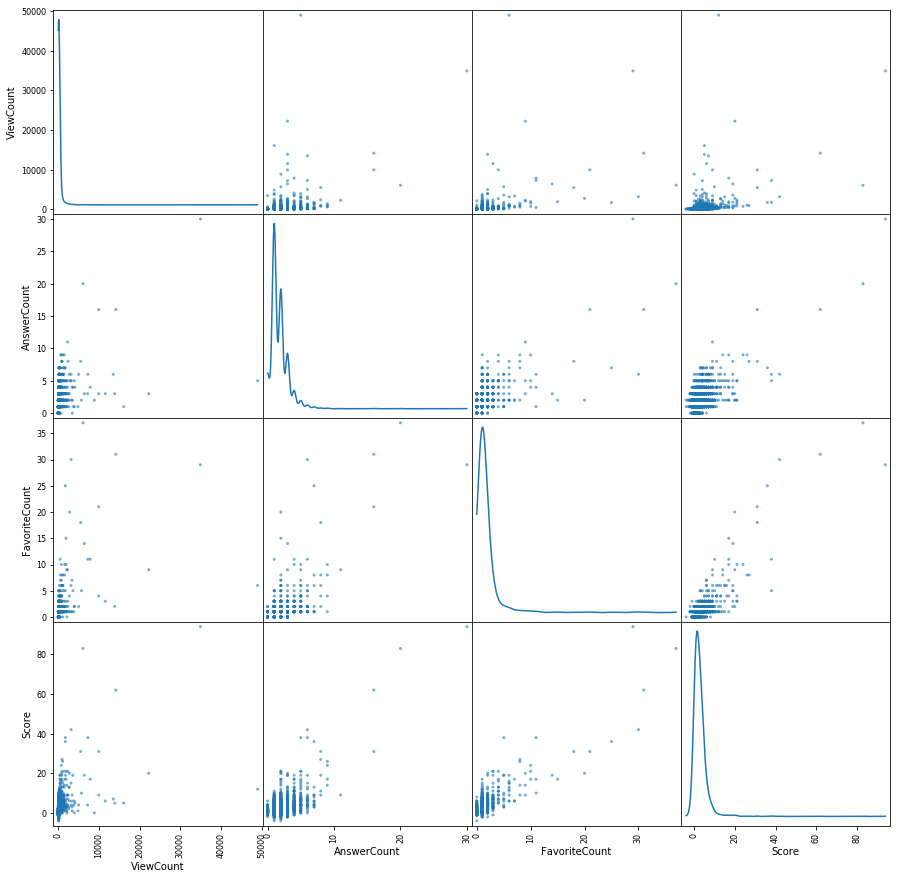

In [127]:
scatter_matrix(EDA_tagged, alpha = 0.6, figsize = (15, 15), diagonal ='kde')
None

In [128]:
EDA_tagged.head()

,ViewCount,AnswerCount,FavoriteCount,Score,CreationDate,LastActivityDate,Tags
0,1458.0,2.0,3.0,21.0,2014-07-30 19:41:29.087,2014-08-11 09:00:51.983,<llc><new-hampshire><united-states>
1,3155.0,6.0,30.0,42.0,2014-07-30 19:47:53.110,2015-07-22 15:08:33.257,<tech-company><mobile-apps><equity>
5,134.0,1.0,NaN,5.0,2014-07-30 20:14:08.337,2014-08-01 21:25:25.923,<business-plan>
6,373.0,6.0,5.0,19.0,2014-07-30 20:20:20.203,2017-08-03 18:34:00.260,<intellectual-property><investment><venture-ca...
12,126.0,1.0,NaN,10.0,2014-07-30 20:56:33.783,2014-08-01 13:03:36.160,<united-kingdom><freelancing>
